Importo le librerie

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

Carica i dati di addestramento e di test:

In [44]:
# Load the pre-processed data
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

Crea un'istanza del classificatore KNN:

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)  # Specifica il numero di vicini da considerare (k)

Addestra il modello utilizzando i dati di addestramento:

In [46]:
knn.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=3)

# Predict on the validation set
Il validation set fornisce una stima delle prestazioni del modello su dati non visti. Se il modello ha ottime prestazioni sul validation set, si può presumere che funzionerà bene anche su nuovi dati.

Validation Accuracy: 0.896551724137931


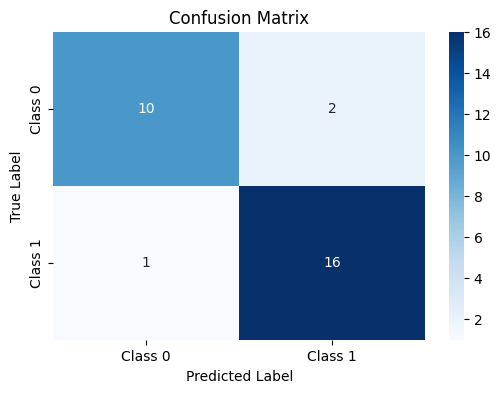

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.91        17

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29

AUC: 0.8872549019607843


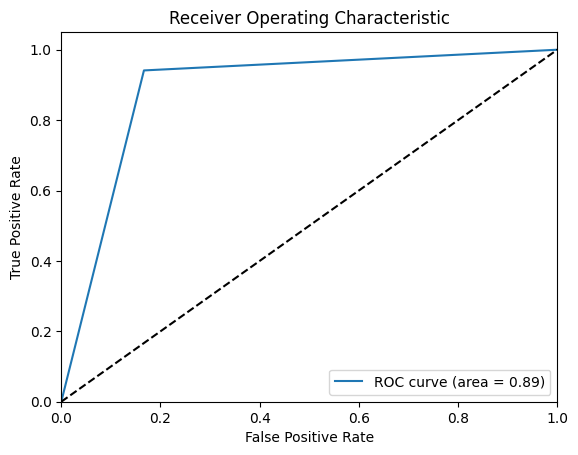

Accuracy scores for each fold: [0.66666667 1.         0.66666667 0.83333333 1.        ]
Mean accuracy: 0.8333333333333333


In [47]:
# Predict on the validation set
val_predictions = knn.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(val_labels, val_predictions)
print("Classification Report:\n", report)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(val_labels, val_predictions)
auc = roc_auc_score(val_labels, val_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Esecuzione della cross-validation
scores = cross_val_score(knn, val_features, val_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

In generale, possiamo concludere che il modello ha buone prestazioni nel riconoscimento delle classi nel validation set.

# Fai previsioni sul dataset di test:

In [48]:
test_predictions = knn.predict(test_features)
print(test_predictions)

[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Metrics to evaluate the performance of the model

In [49]:
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


Un'accuracy del 96.67% indica che il modello KNN ha raggiunto un buon livello di precisione nella classificazione dei dati. 

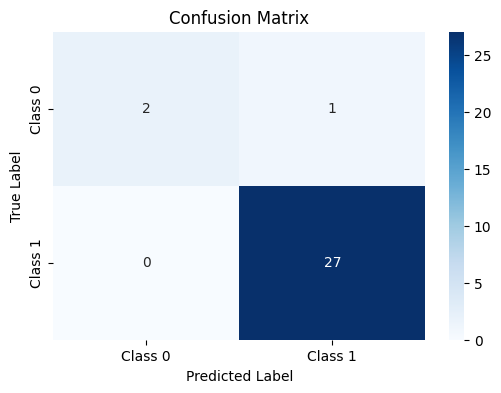

In [50]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Il modello ha correttamente classificato 2 campioni come appartenenti alla classe 0 e 27 campioni come appartenenti alla classe 1. Non sono stati commessi falsi negativi, mentre è stato commesso un falso positivo.

Questa matrice di confusione indica che il modello KNN ha ottenuto buoni risultati nella classificazione dei dati, con un alto numero di campioni correttamente classificati.

In [51]:
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.96      1.00      0.98        27

    accuracy                           0.97        30
   macro avg       0.98      0.83      0.89        30
weighted avg       0.97      0.97      0.96        30



- Precision: La precisione per la classe 0 è del 100%, il che significa che tutti i campioni classificati come classe 0 sono effettivamente corretti. Per la classe 1, la precisione è del 96%, indicando che la maggior parte dei campioni classificati come classe 1 sono corretti.
- Recall: Il richiamo (recall) per la classe 0 è del 67%, il che significa che il modello è in grado di individuare il 67% dei campioni appartenenti alla classe 0. Per la classe 1, il richiamo è del 100%, indicando che il modello è in grado di individuare tutti i campioni della classe 1.
- F1-score: L'F1-score per la classe 0 è del 0.80, che è una media armonica tra la precisione e il richiamo per quella classe. Per la classe 1, l'F1-score è del 0.98, indicando un alto equilibrio tra precisione e richiamo.
- Accuracy: L'accuratezza del modello è del 97%, il che indica che il 97% dei campioni nel set di test è stato classificato correttamente.
Complessivamente, questi risultati indicano che il modello KNeighborsClassifier ha ottenuto buone prestazioni nella classificazione dei dati, con un'alta precisione, recall e F1-score per entrambe le classi e un'accuratezza molto elevata.

AUC: 0.8333333333333334


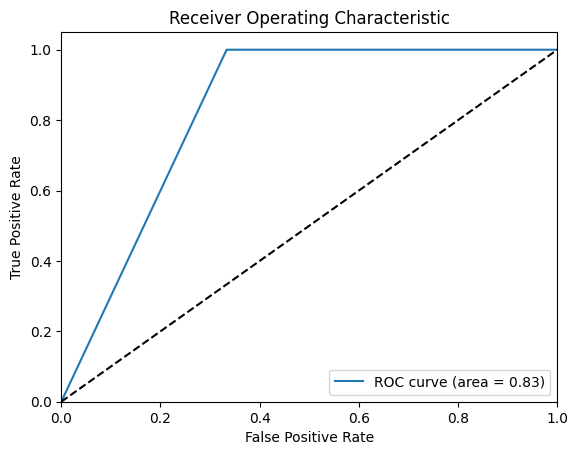

In [52]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- AUC: Il valore dell'AUC è del 0.8333. L'AUC rappresenta l'area sottesa alla curva ROC e fornisce una misura della capacità discriminante del modello. Un valore di AUC superiore a 0.5 indica che il modello ha una buona capacità di distinguere tra le classi.

- ROC curve area: L'area sotto la curva ROC è del 0.83. La curva ROC rappresenta la relazione tra il tasso di falsi positivi (False Positive Rate) e il tasso di veri positivi (True Positive Rate) al variare della soglia di classificazione. Un'area ROC più vicina a 1 indica una migliore performance del modello nella classificazione.

I valori ottenuti indicano che il modello ha una capacità discreta di discriminazione tra le classi, ma potrebbe essere migliorato per ottenere una maggiore precisione nella classificazione.

In [53]:
# Esecuzione della cross-validation
scores = cross_val_score(knn, train_features, train_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.92857143 0.92592593 0.85185185 0.96296296 0.85185185]
Mean accuracy: 0.9042328042328043


La cross-validation è stata eseguita per valutare le prestazioni del modello KNeighborsClassifier su diverse porzioni del dataset. Questo aiuta a fornire una stima più accurata delle reali capacità di generalizzazione del modello e ad identificare eventuali problemi di overfitting o underfitting.

Nel caso specifico, eseguendo la cross-validation, abbiamo ottenuto i punteggi di accuratezza per ciascun fold. Calcolando poi la media di questi punteggi, abbiamo ottenuto un'indicazione generale delle prestazioni del modello su diverse suddivisioni dei dati.

La cross-validation ci permette quindi di avere una visione più robusta delle prestazioni del modello e di fare una valutazione più affidabile delle sue capacità predittive.

I risultati suggeriscono che il modello ha una buona capacità di generalizzazione e prestazioni stabili su diverse porzioni del dataset.